# Problem Statement:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
12 weeks.


# Project Objective:
The objective of this project is to develop a machine learning model that can accurately forecast sales for the next year.This will be achieved by using a Time series techniques to train the model on historical sales data, as well as other relevant factors such as Temperature on the given date and CPI at that time. The model will be evaluated on its ability to predict future sales with high accuracy, and the results will be used to inform business decisions about inventory management, Resource allocation, Marketing strategies...etc.

# Data Description:
The data availabla here is the  historical sales data for 45 Walmart stores located in different regions. The data includes the following fields: 
1. **Store** : The store number.
2. **Date:** : Week date
3. **Weekly_Sales**: Weekly Sales in Dollars
4. **Holiday_Flag**: Whether the week is holiday week or not 
5. **Temperature**: Average temperature in the region
6. **Fuel_Price**: Cost of fuel in the region
7. **CPI**: Customer price index
8. **Unemployment**: The unemployment rate at that time

## Performing EDA

In [512]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings
warnings.filterwarnings("ignore")

In [513]:
df = pd.read_excel(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\Walmart Sales Forecast\Walmart_Sales.xlsx",parse_dates=['Date'])
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106


In [514]:
# Checking for NaN values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [515]:
# Describing our data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# <h4><center>Observations</center></h4>
* No NaN values present in the data set. 
* All data types are correctly configured for analysis

In [517]:
# Setting Date as index to understand about our data over the time
df_indexed = df.set_index('Date')
df_indexed.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106


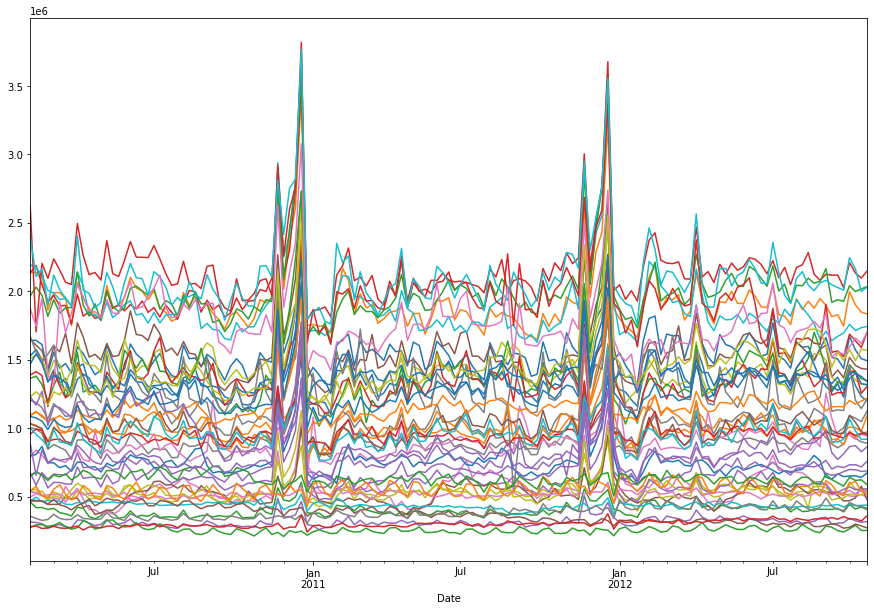

In [518]:
# Performing Univariate Analysis
plt.figure(figsize=(15,10))
df_indexed.groupby('Store')['Weekly_Sales'].plot()
plt.show()

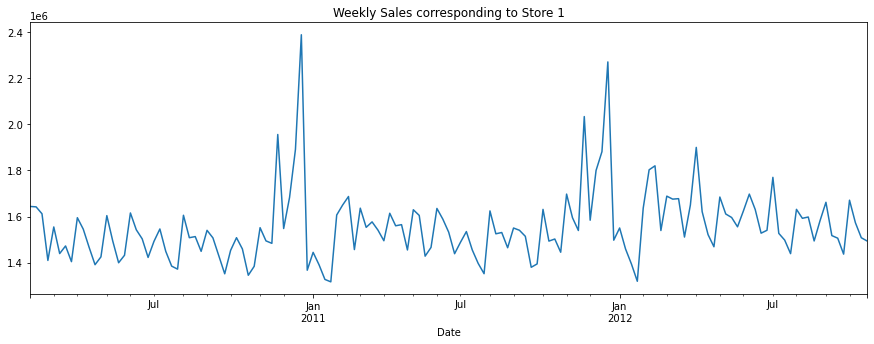

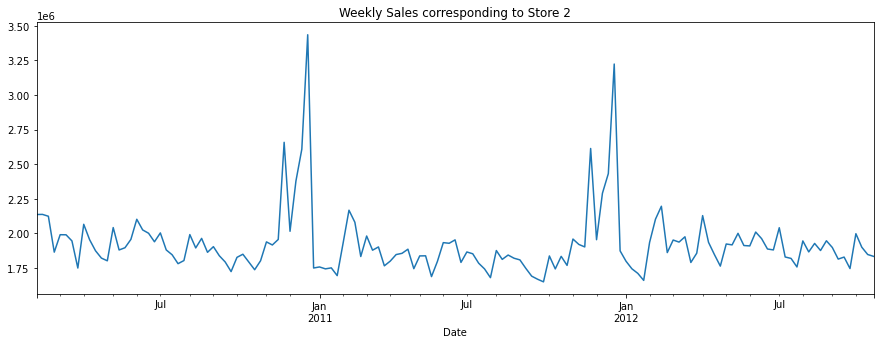

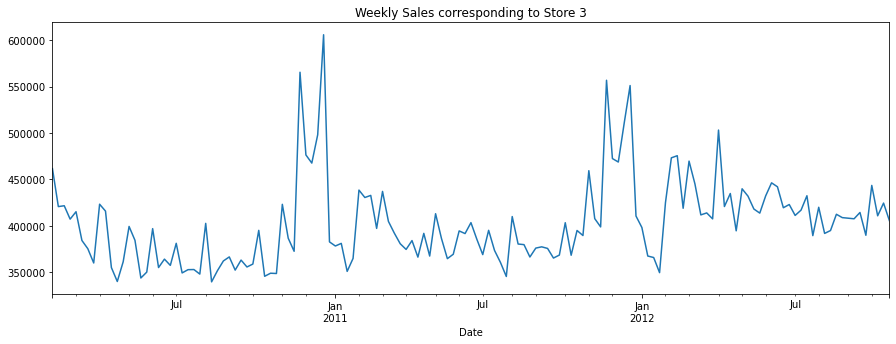

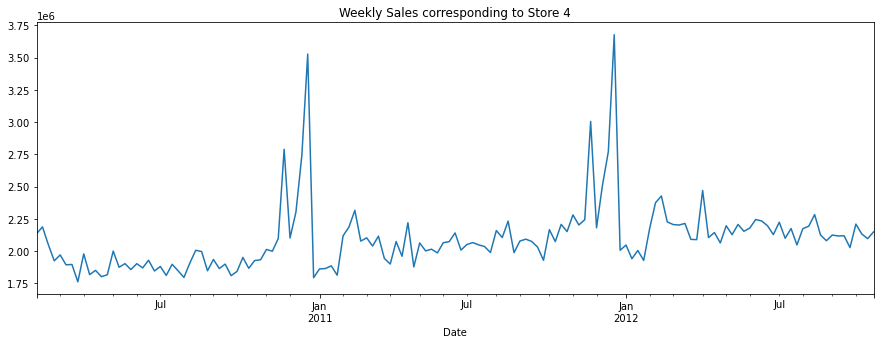

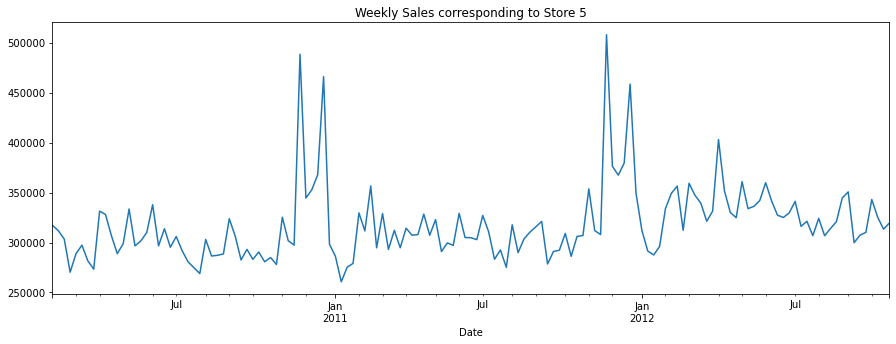

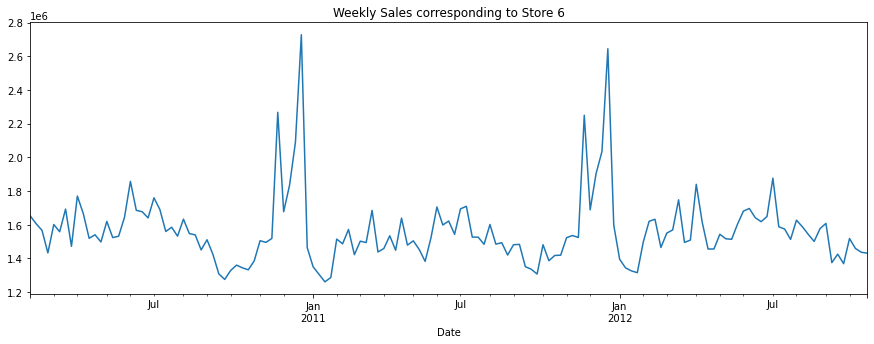

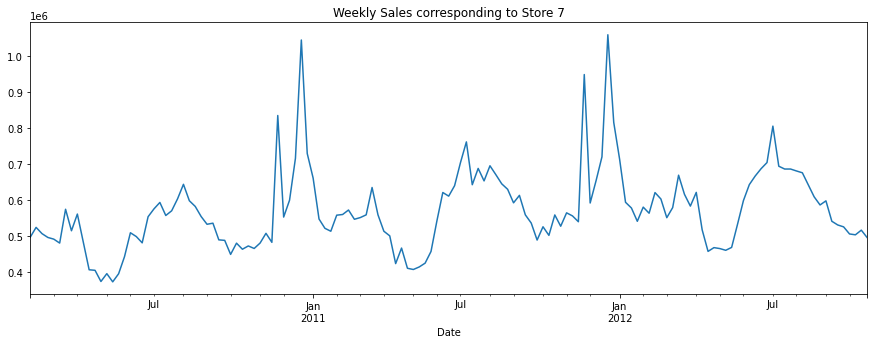

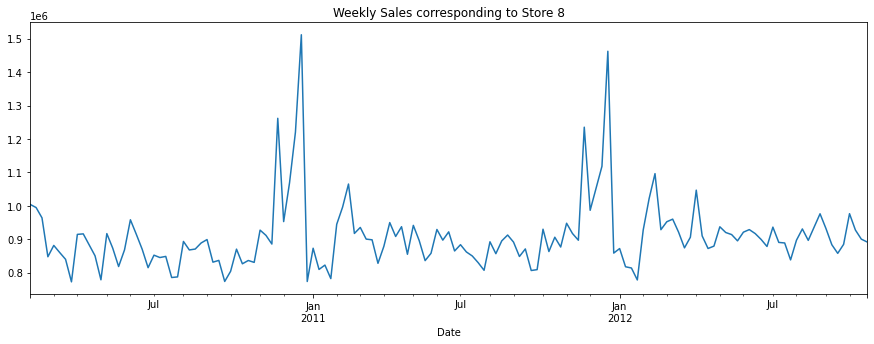

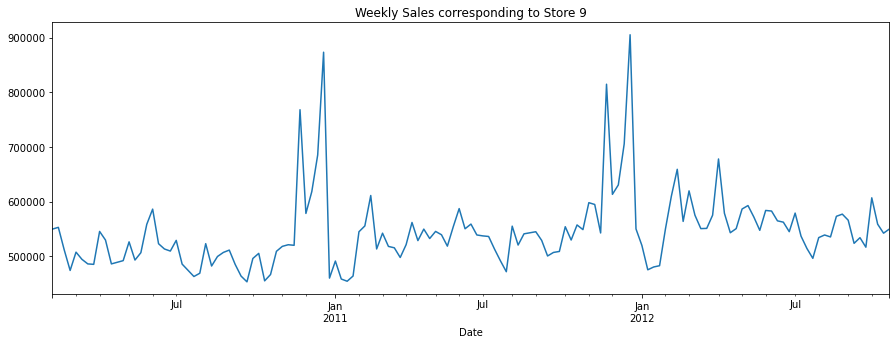

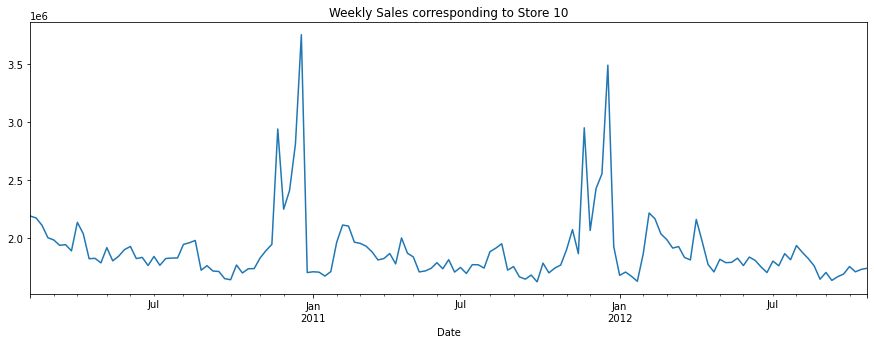

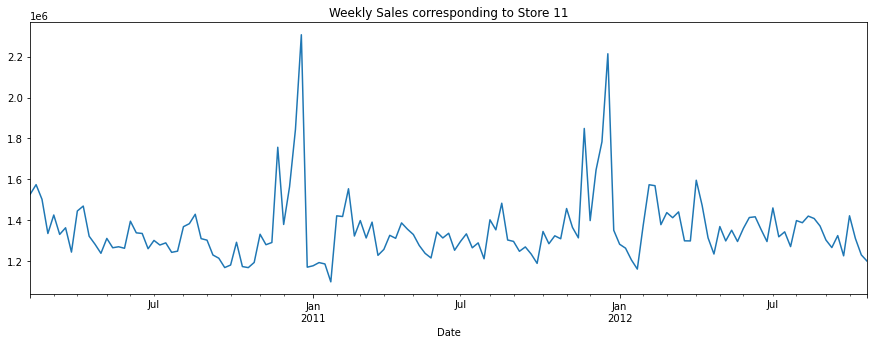

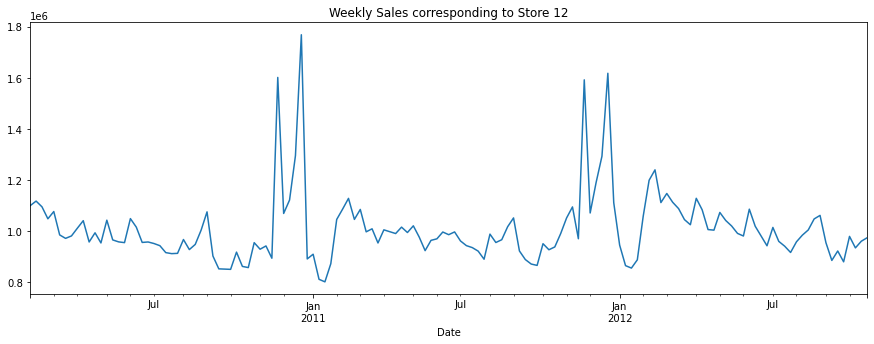

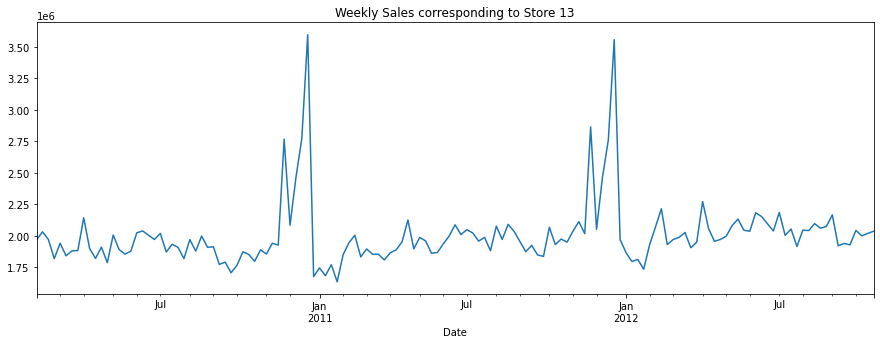

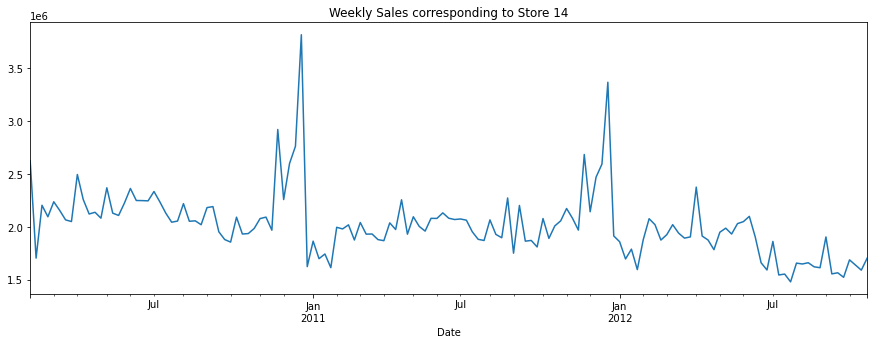

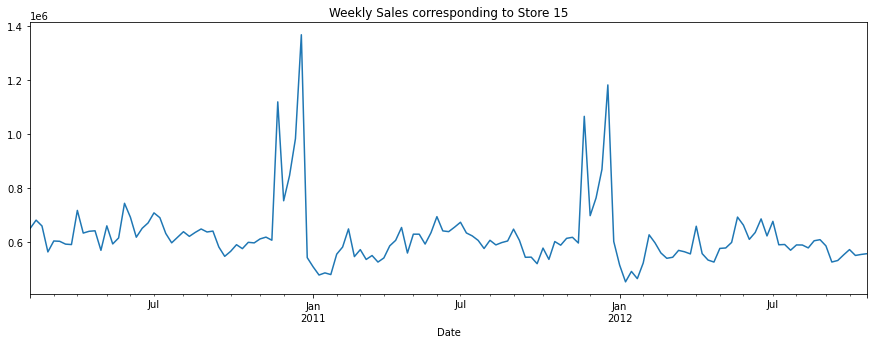

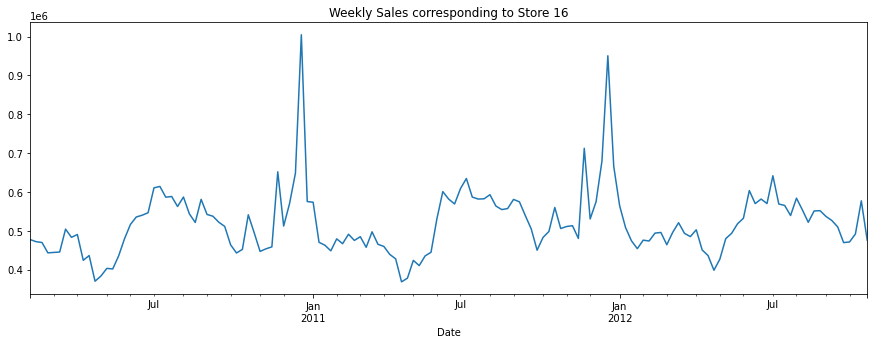

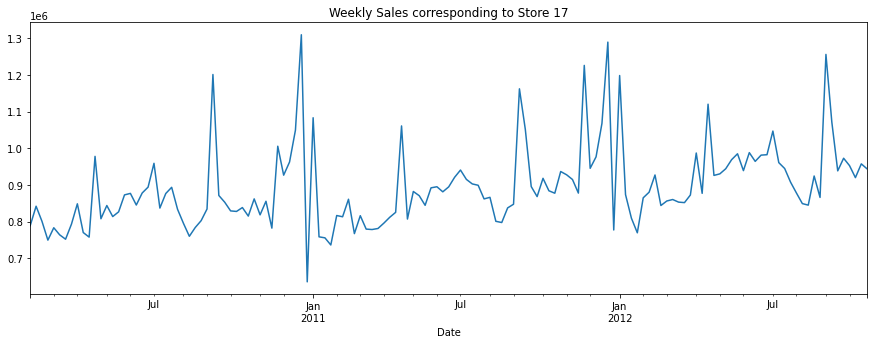

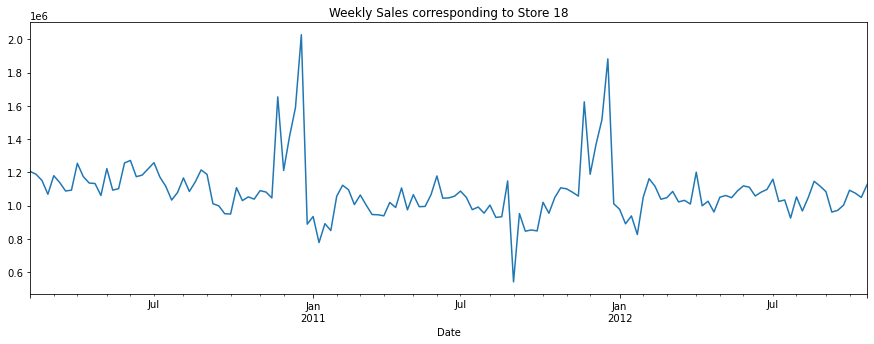

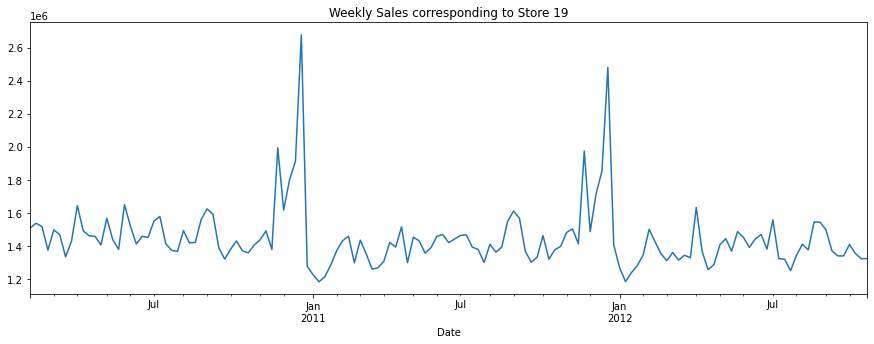

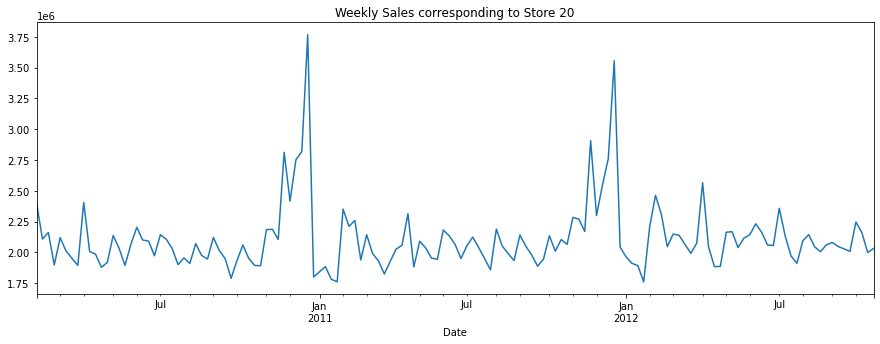

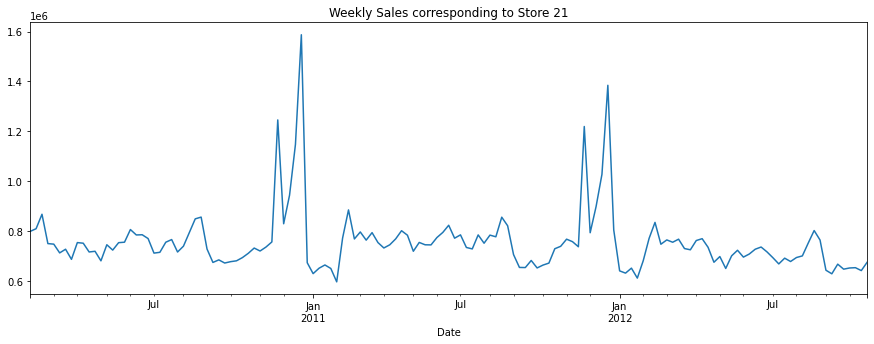

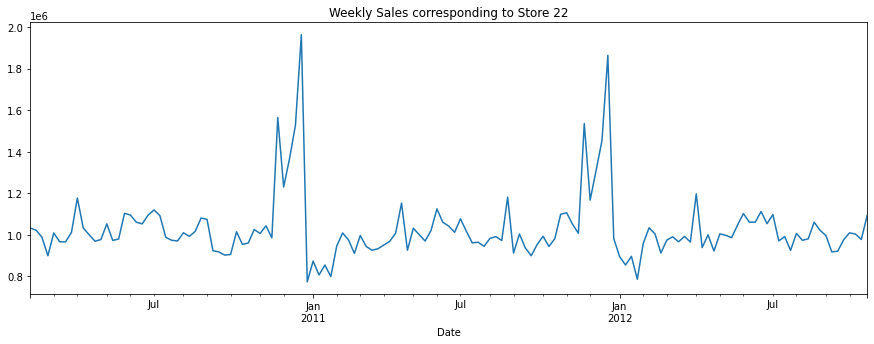

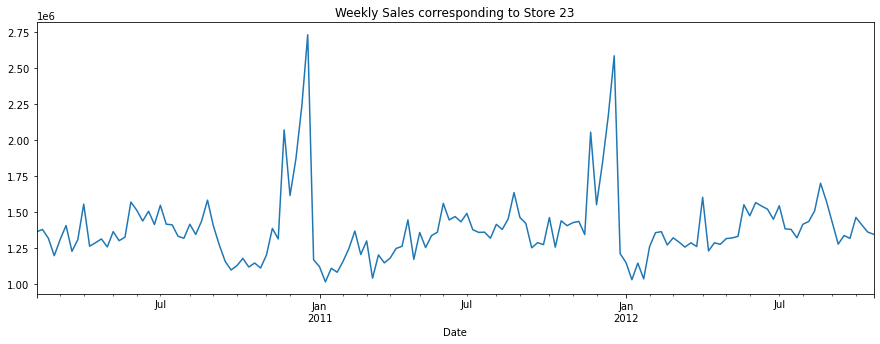

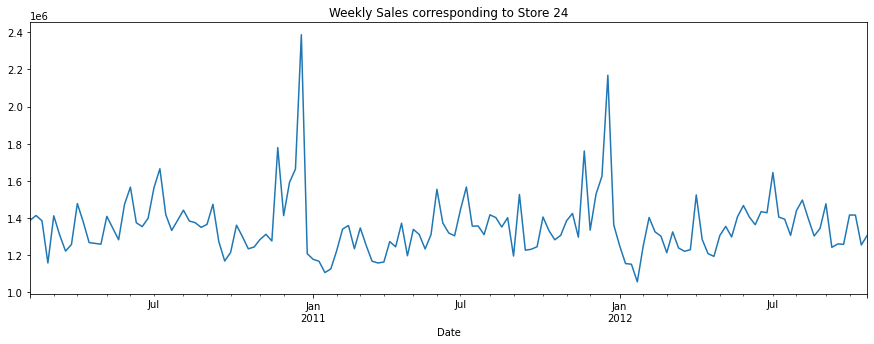

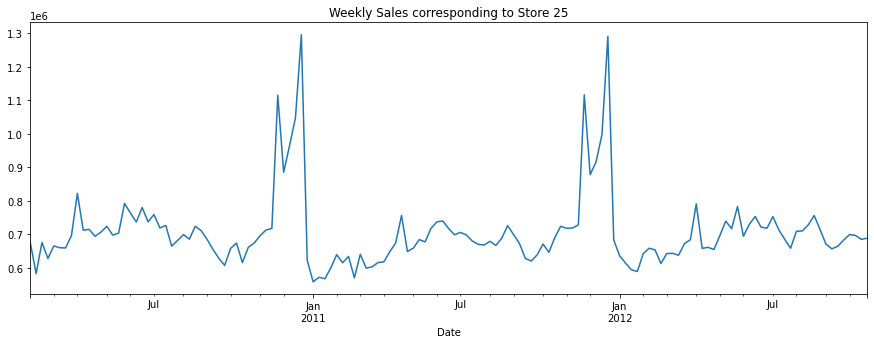

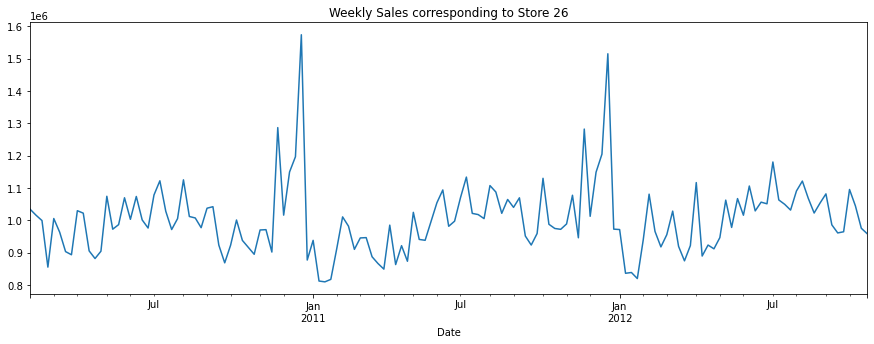

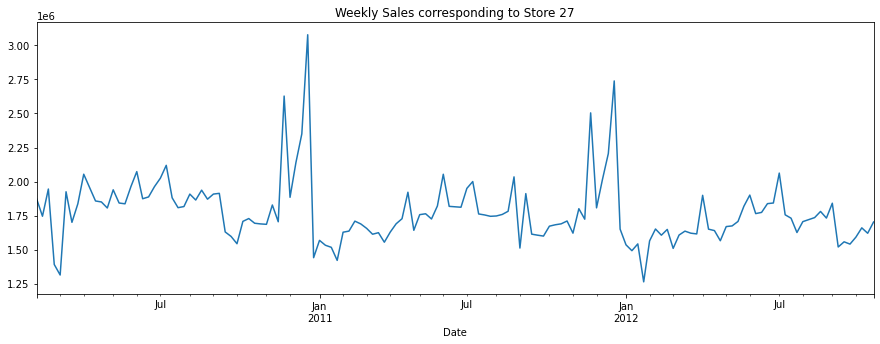

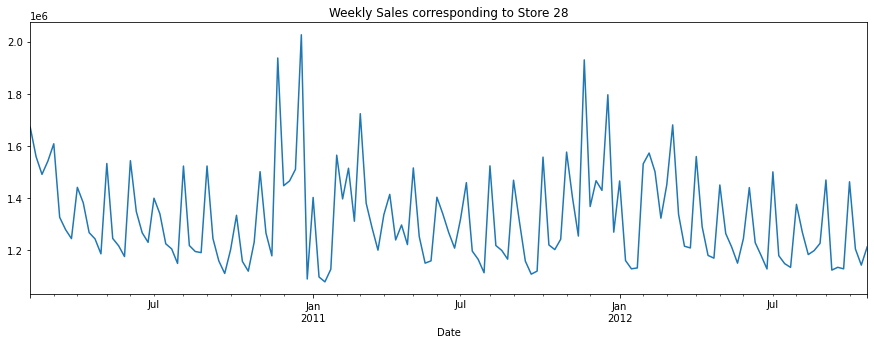

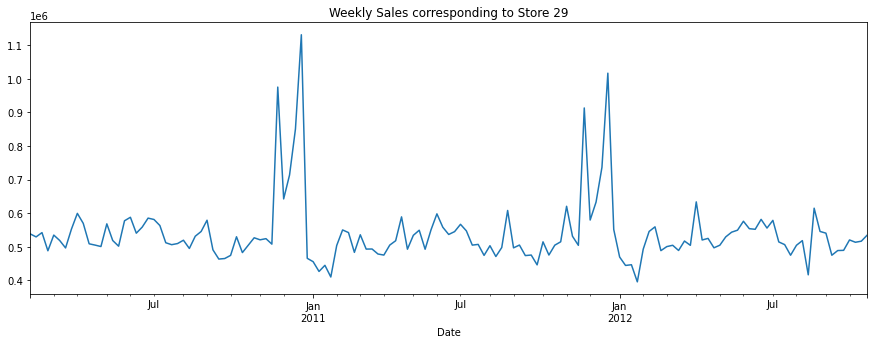

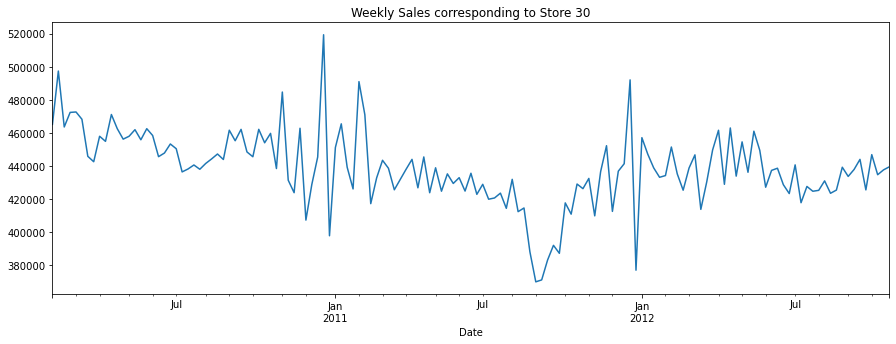

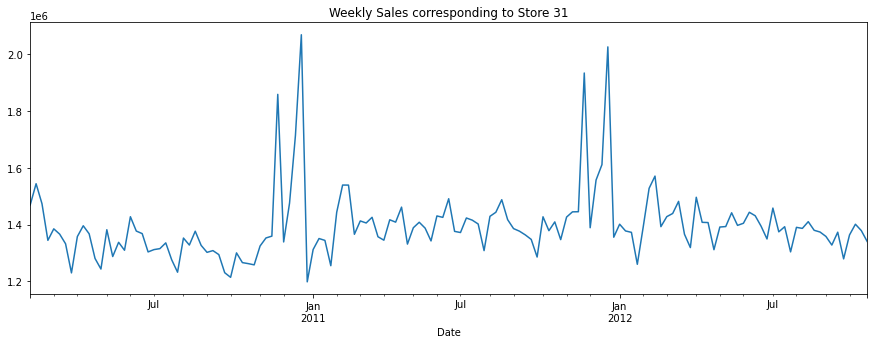

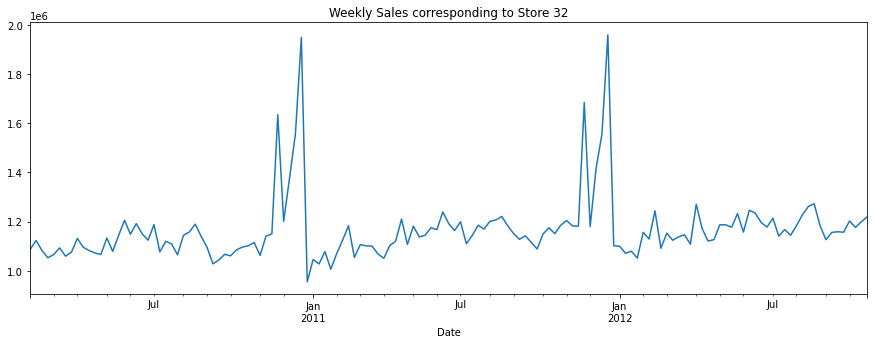

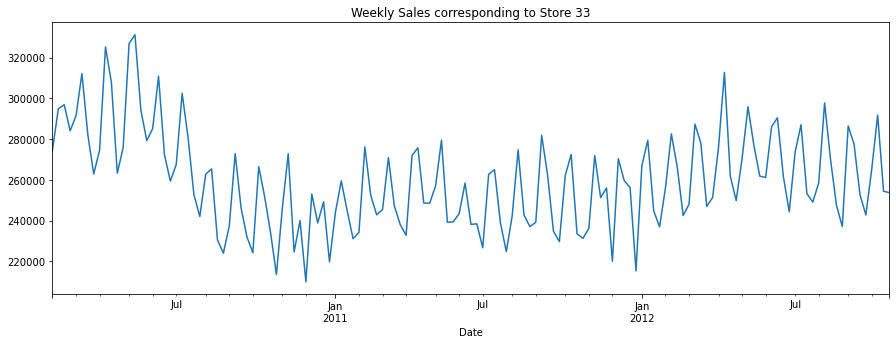

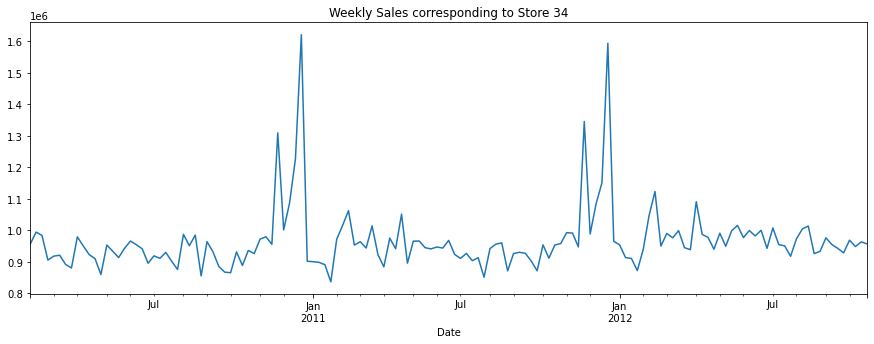

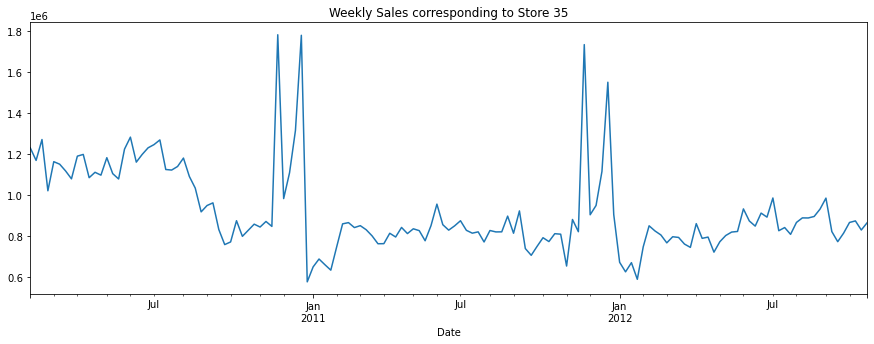

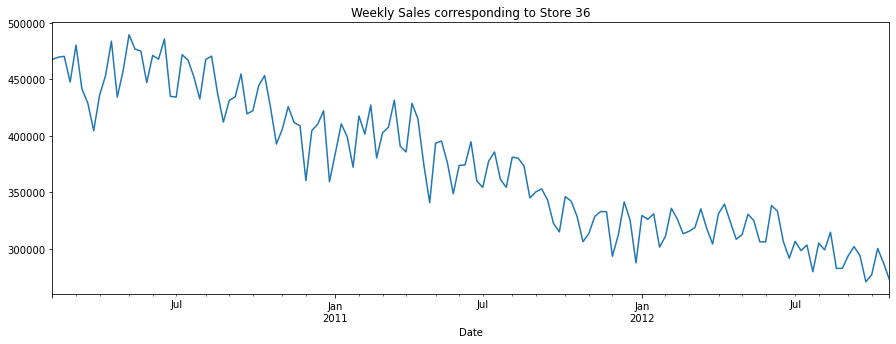

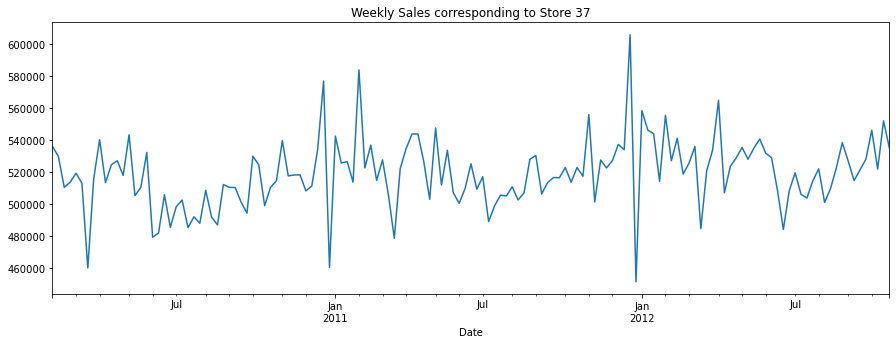

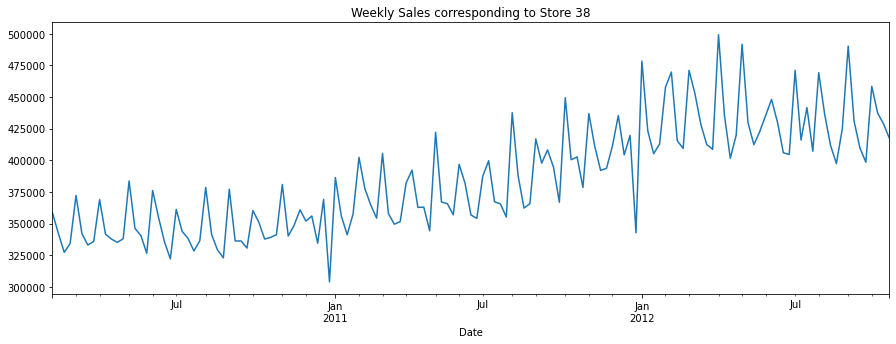

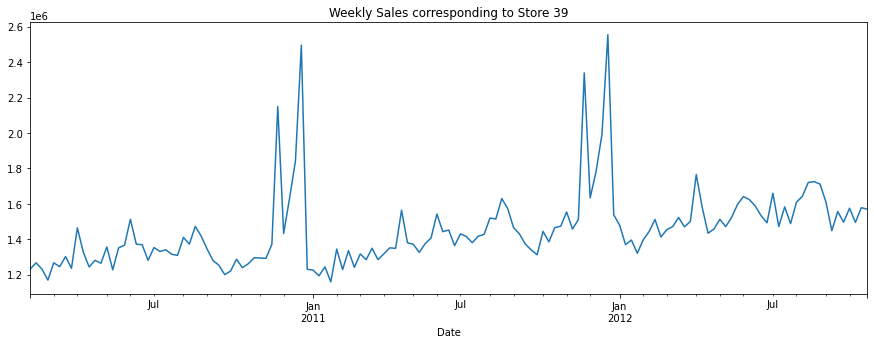

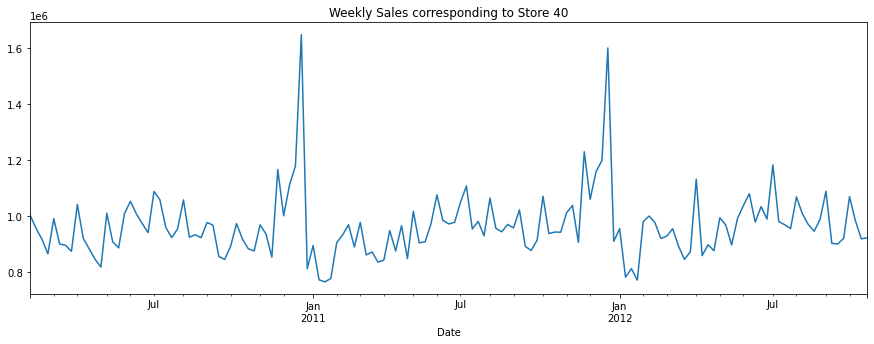

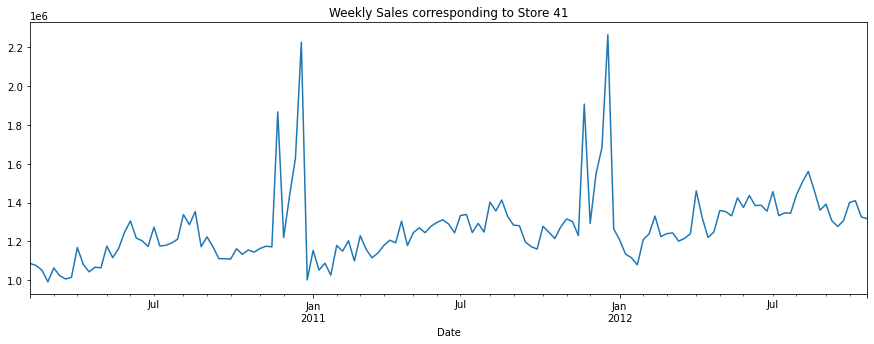

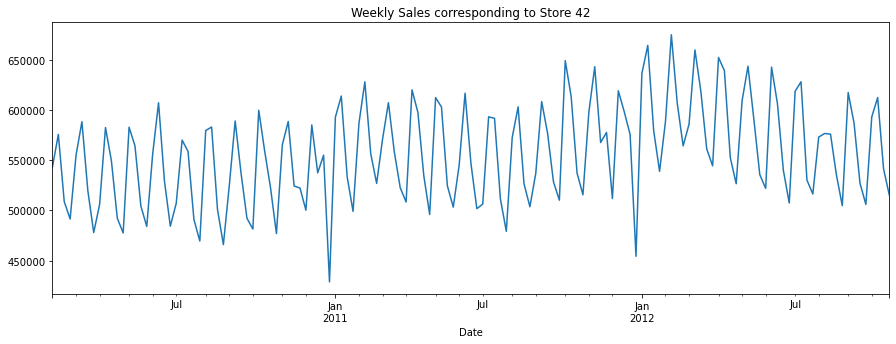

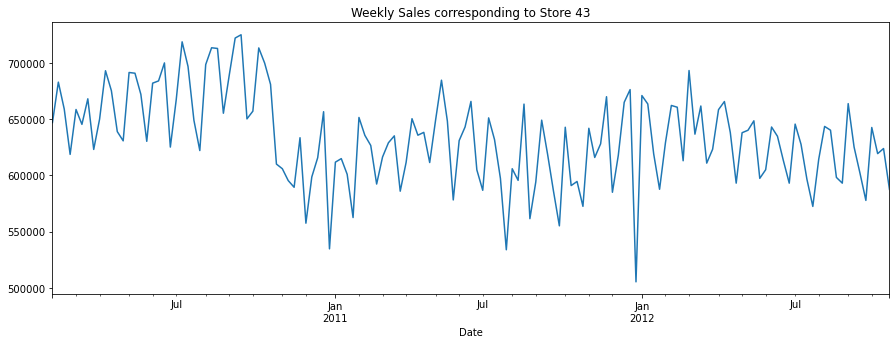

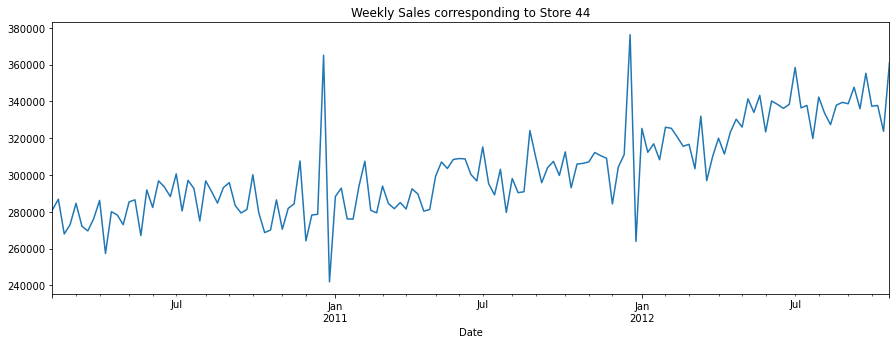

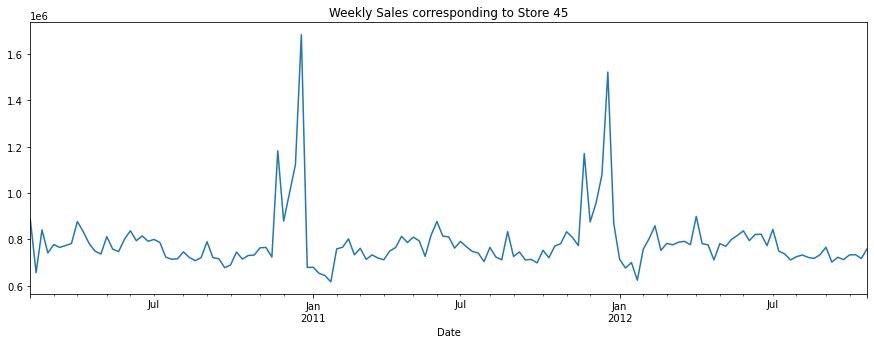

In [519]:
grouped_data = df.groupby('Store')
for i in range(1,46):
    plt.figure(figsize=(15,5))
    group = grouped_data.get_group(i).set_index('Date')['Weekly_Sales'].plot()
    plt.title("Weekly Sales corresponding to Store {}".format(i))
    plt.show()

In [520]:
Stores_exhibiting_different_patterns = [28,30,33,35,37,36,38,42,43,44]
all_stores = set([i for i in range(1,46)])
Stores_with_similar_patterns = list(all_stores - set(Stores_exhibiting_different_patterns))
print(Stores_exhibiting_different_patterns)
print(Stores_with_similar_patterns)

[28, 30, 33, 35, 37, 36, 38, 42, 43, 44]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 34, 39, 40, 41, 45]


# <h4><center>Observations</center></h4>
* Pattern of the weekly sales looks same in the given below stores. 
    - [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 34, 37, 39, 40, 41, 45].

* Different pattern is observed in the remaining Stores.
    - [28, 30, 33, 35, 36, 38, 42, 43, 44]



Let's try our analysis on one store and replicate the same to other stores.

In [521]:
# Randomly picked the store number.
df_indexed_store_8 = df_indexed[df_indexed['Store']==8]
import plotly.express as px
fig = px.line(df_indexed_store_8.sort_index(),y='Weekly_Sales',title='Weekly Sales over time')
fig.update_xaxes(
    rangeslider_visible = True
)

In [522]:
# Checking for stationarity in the data - by Adfuller test
from statsmodels.api import tsa
groups = df_indexed.groupby('Store')
stores_with_stationary_sales = []
stores_with_non_stationary_sales = []
for i in range(1,46):
    group_Weekly_Sales = groups.get_group(i)['Weekly_Sales']
    if tsa.adfuller(df_indexed['Weekly_Sales'])[1]>0.05:
        #print("The given Store {} Weekly Sales are not stationary".format(i))
        stores_with_non_stationary_sales.append(i)
    else:
        #print("The given Store {} Weekly Sales are stationary".format(i))
        stores_with_stationary_sales.append(i)
print("The stores that are having stationary weekly_sales:", stores_with_stationary_sales)
print("The stores that are having non-stationary weekly_sales:", stores_with_non_stationary_sales)
    


The stores that are having stationary weekly_sales: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
The stores that are having non-stationary weekly_sales: []


* All the stores are exhibiting stationary weekly sales, that means all the weakly sales are following the additive seasonality component. 

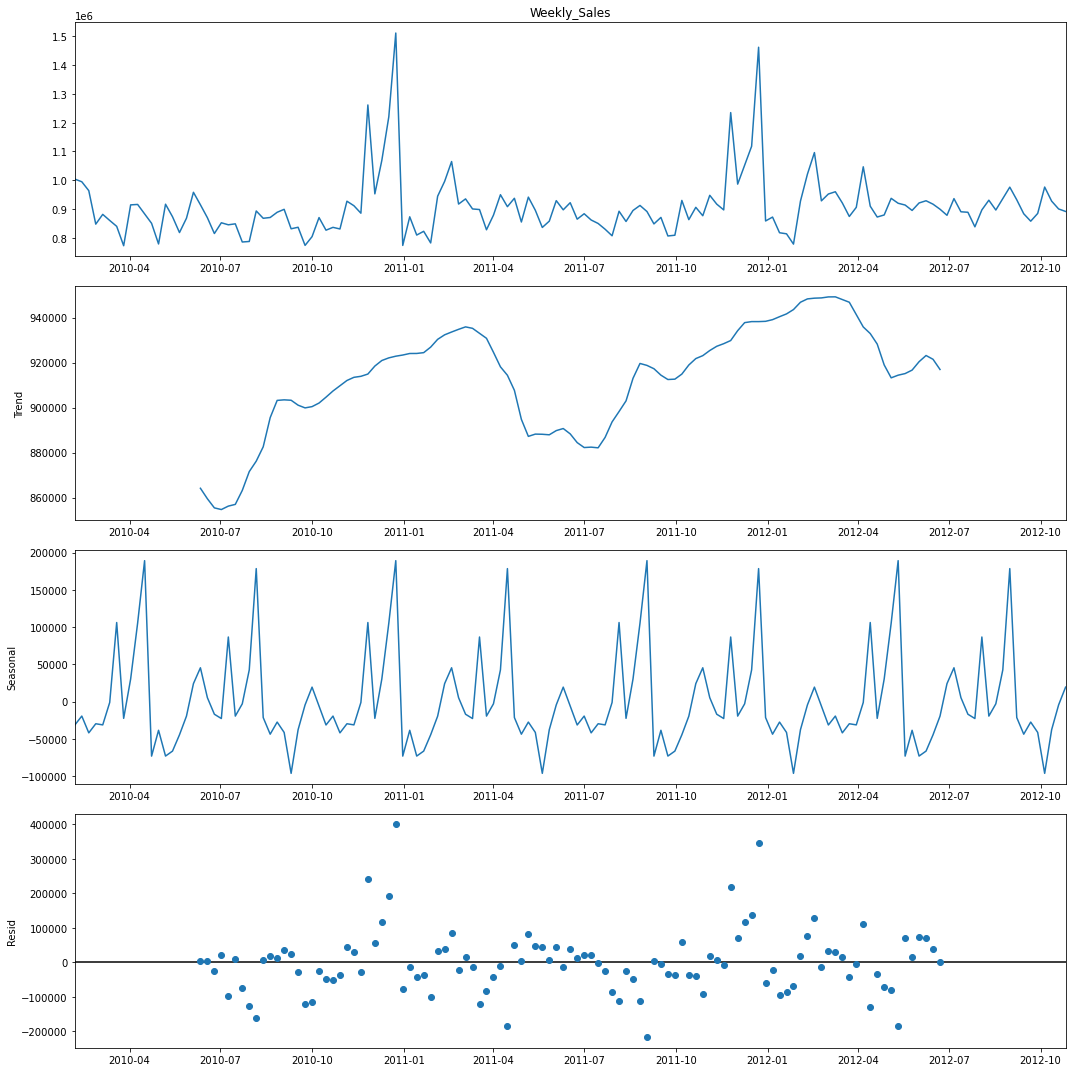

In [523]:
# Decomposing the time series into the components:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_indexed_store_8['Weekly_Sales'].sort_index(),model='additive',period=36)
plt.rcParams["figure.figsize"] = (15,15)
decompose.plot();
plt.show()

* As per the anlysis of decomposed components, it is clear that the sales are not linearly growing, irregular trend is observed in the sales. Trend is found to be increasing in the intial 8 months, later a sudden decreased trend is observed followed by a constant for 3 months and again an irregular increase with time. 
* Annual seasonality is found in the given data. Sudden increase in sales is found in the mid of Nov and Dec months. This pattern of sudden increase in sales is observed seasonally over the rest of the years also.

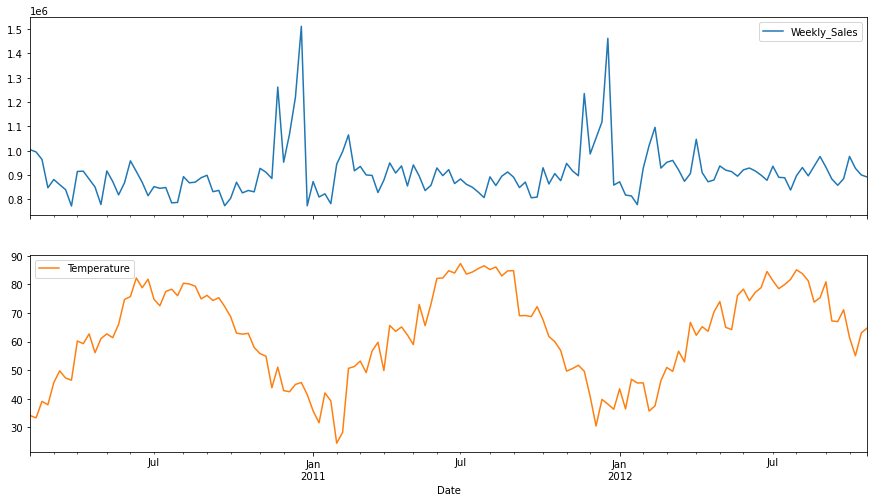

In [524]:
# Effect of other parameters on Weekly_Sales
# Effect of temperature
plt.rcParams["figure.figsize"] = (15,8)
df_indexed_store_8[['Weekly_Sales','Temperature']].plot(subplots=True)

plt.show()


* It is clearly visible that, Weekly sales and temperature are negatively correlated with each other. Sales are pretty low on high temperature days comparing to other days. Refer the below plot for better understanding. 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

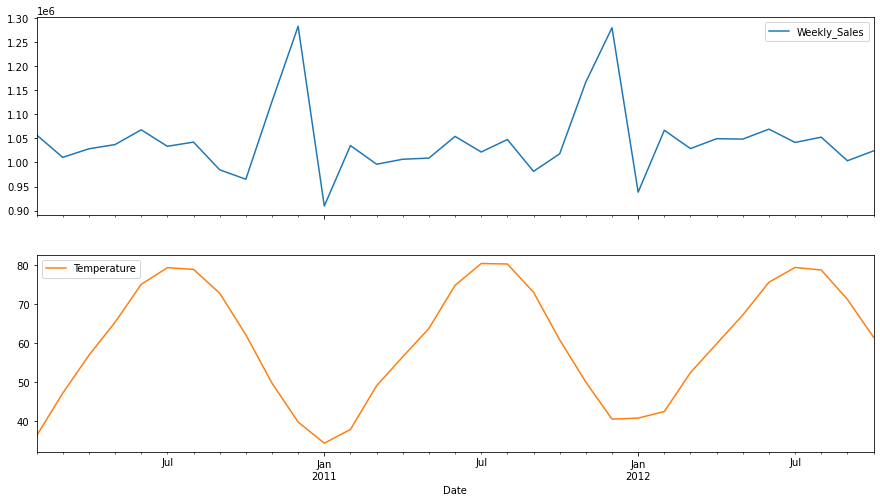

In [525]:
# Effect of Temperature on the Weekly_Sales
df_indexed[['Weekly_Sales','Temperature']].resample('M').mean().plot(subplots=True)

<AxesSubplot:xlabel='Date'>

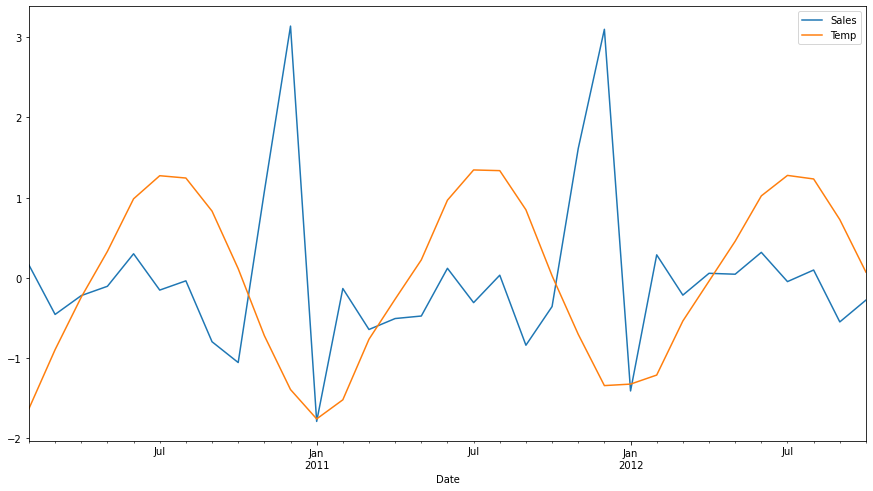

In [526]:
# Analysing the effect of temp at month level on the entire data 

#Resampling the data to month level 
temp_df = df_indexed.resample('M')[['Weekly_Sales','Temperature']].mean()
#Scaling the features in order to understand the change in a single plot
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
index = temp_df.index
temp_df = pd.DataFrame(scale.fit_transform(temp_df),columns=['Sales','Temp'])
temp_df['Date'] = index
temp_df.set_index('Date',inplace=True)
temp_df.plot()

<AxesSubplot:>

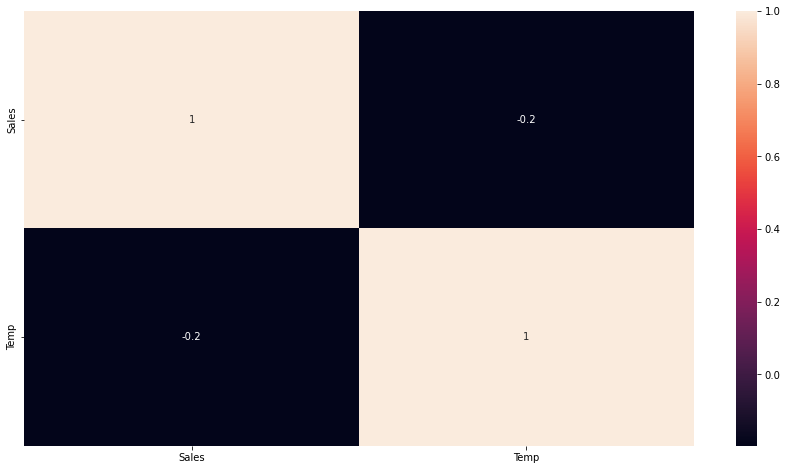

In [527]:
# Quantifying the relation between Temp and Sales
sb.heatmap(temp_df.corr(),annot=True)

* Weekly sales are low when the temperature is high. Looks like people tend to prefer shopping when the temperature is low. 
    

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

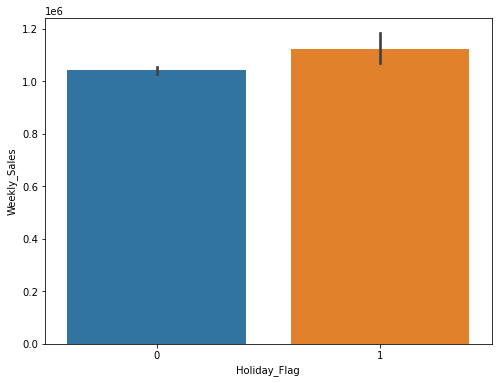

In [528]:
# Effect of Holidays on Weekly_Sales
plt.rcParams["figure.figsize"] = (8,6)
sb.barplot(data=df_indexed,x='Holiday_Flag',y='Weekly_Sales')

In [529]:
(df_indexed.groupby('Holiday_Flag')['Weekly_Sales'].mean()[1]- df_indexed.groupby('Holiday_Flag')['Weekly_Sales'].mean()[0])*100/df_indexed.groupby('Holiday_Flag')['Weekly_Sales'].mean()[0]

7.839713033050179

* Average sales on Holidays are 7.83% Higher than the average sales of normal days. This is not a significant difference but indicates that some people are preferring shopping on Holidays. 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

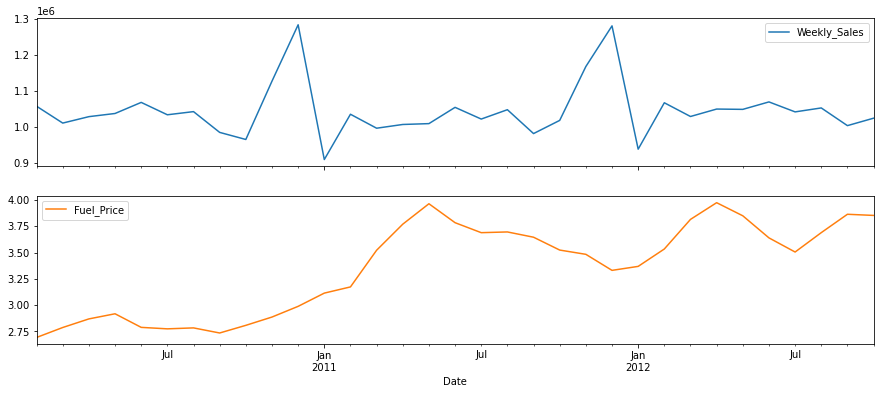

In [530]:
# Effect of fuel price on the Weekly_Sales
plt.rcParams["figure.figsize"] = (15,6)
df_indexed[['Weekly_Sales','Fuel_Price']].resample('M').mean().plot(subplots=True)

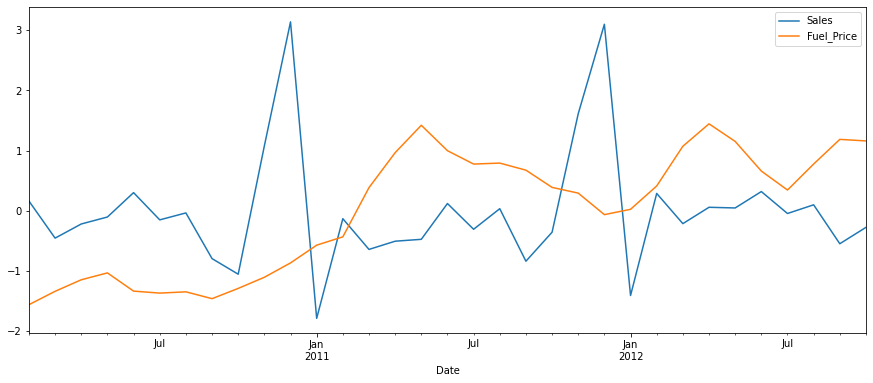

In [531]:
#Resampling the data to month level 
temp_df = df_indexed.resample('M')[['Weekly_Sales','Fuel_Price']].mean()
# Scaling the features in order to understand the change in a single plot
scale =StandardScaler()
index = temp_df.index
temp_df = pd.DataFrame(scale.fit_transform(temp_df),columns=['Sales','Fuel_Price'])
temp_df['Date'] = index
temp_df.set_index('Date',inplace=True)
plt.rcParams["figure.figsize"] = (15,6)
temp_df.plot()
plt.show()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

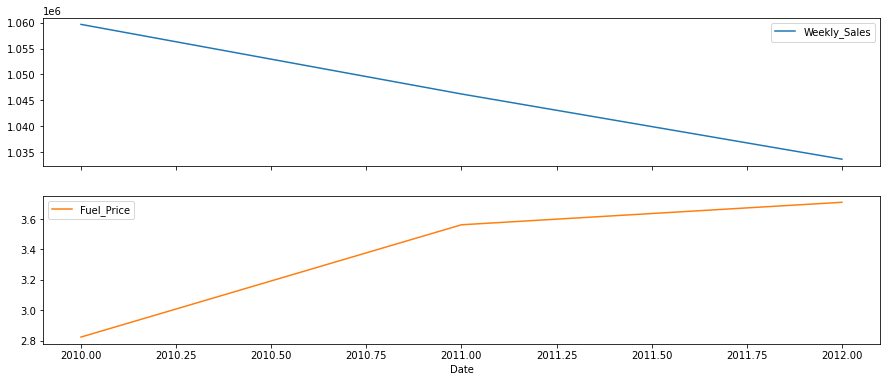

In [532]:
df.groupby(df['Date'].dt.year)['Weekly_Sales','Fuel_Price'].mean().plot(subplots=True)

In [533]:
x = df.groupby(df['Date'].dt.year)['Weekly_Sales','Fuel_Price'].mean()
print("Average weekly Sales reduced from 2010 to 2012 because of increase in fuel price:",(x.loc[2010]['Weekly_Sales']-x.loc[2012]['Weekly_Sales'])*100/x.loc[2010]['Weekly_Sales'])

Average weekly Sales reduced from 2010 to 2012 because of increase in fuel price: 2.4544546914123027


* Between  2010 and 2013, Average fuel price is increased from 2.823 to 3.709. And the average weekly sales are reduced by -2.45%. As per this analysis, people mightnot  be prefering for frequent shopping becauseof increased fuel prices.  

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

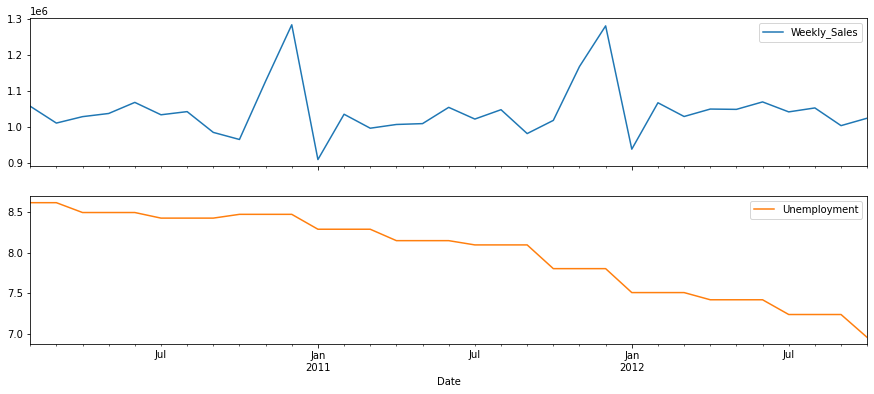

In [534]:
# Effect of Unemployment on Weekly_Sales
df_indexed.resample('M').mean()[['Weekly_Sales','Unemployment']].plot(subplots=True)

* Unemployment rate is decreased over years. This is not affecting the weekly_sales in a significant level. 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

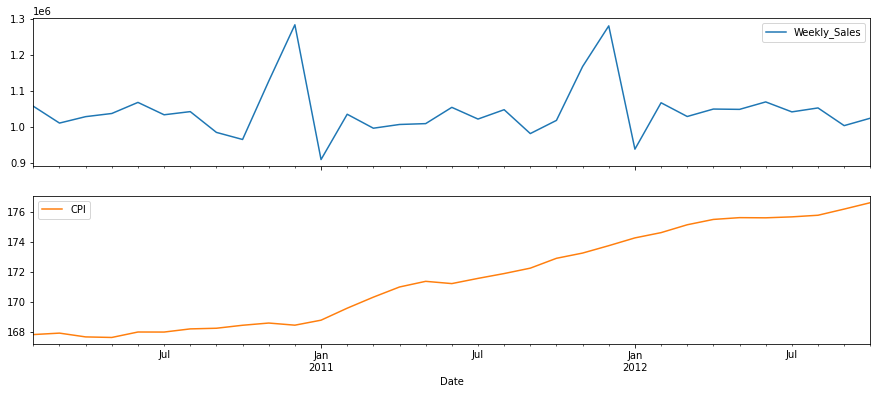

In [535]:
# Effect of CPI on Weekly_Sales
df_indexed.resample('M')[['Weekly_Sales','CPI']].mean().plot(subplots=True)

* Average CPI rate is increased over the years. This is not affecting the weekly_sales in a significant level.

In [536]:
# Analysing the the sudden raise in the Weekly Sales in the mid of Nov and Dec months
temp_df = df[['Date','Store','Holiday_Flag','Weekly_Sales']]
temp_df['Month'] = temp_df['Date'].dt.month
grouped_data_month = pd.DataFrame(temp_df[temp_df['Holiday_Flag']==1][['Month','Store','Holiday_Flag']].groupby(['Month','Store'])['Holiday_Flag'].sum()).reset_index()

<AxesSubplot:xlabel='Month', ylabel='Holiday_Flag'>

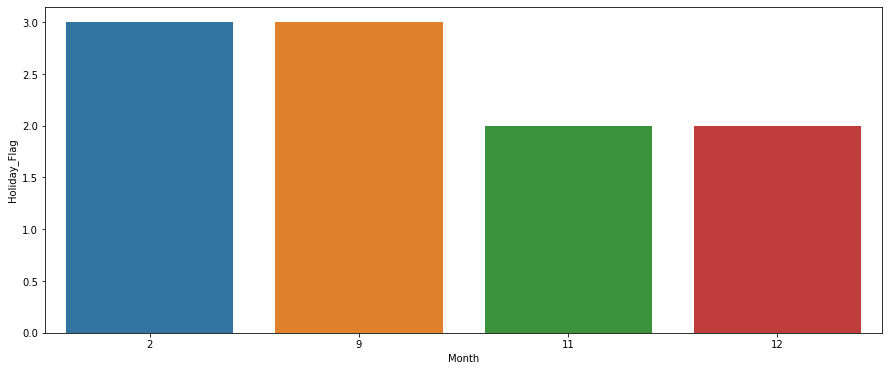

In [537]:
sb.barplot(data=grouped_data_month,x='Month',y='Holiday_Flag')

<AxesSubplot:xlabel='Store', ylabel='Holiday_Flag'>

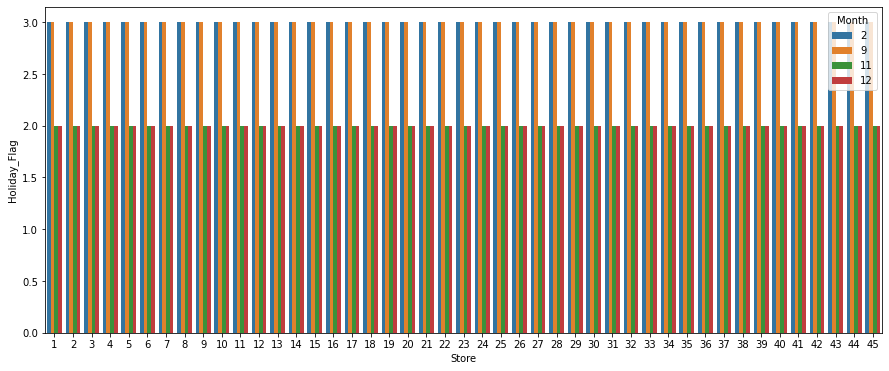

In [538]:
sb.barplot(data=grouped_data_month,x='Store',y='Holiday_Flag',hue='Month')

In [539]:
# Analysing the the sudden raise in the Weekly Sales in the mid of Nov and Dec months
temp_df = df[['Date','Store','Holiday_Flag','Weekly_Sales']]
temp_df['Month'] = temp_df['Date'].dt.month
grouped_data_month = pd.DataFrame(temp_df[temp_df['Holiday_Flag']==1][['Month','Store','Holiday_Flag','Date']].groupby(['Month','Store','Date'])['Holiday_Flag'].sum()).reset_index()

In [540]:
pd.DataFrame(grouped_data_month['Date'].value_counts())

,Date
2010-02-12,45
2011-02-11,45
2012-02-10,45
2010-09-10,45
2011-09-09,45
2012-09-07,45
2010-11-26,45
2011-11-25,45
2010-12-31,45
2011-12-30,45


In [541]:
Holiday_dates = ['2010-02-12', '2011-02-11', '2012-02-10', '2010-09-10',
               '2011-09-09', '2012-09-07', '2010-11-26', '2011-11-25',
               '2010-12-31', '2011-12-30']


* The above distribution indicates that the no.of holidays found as below:
    - Feb: 3 days
    - Sep: 3 days
    - Nov: 2 days
    - Dec: 2 days
* No. of holidays are same in each store
* Holidays are found to on the below given dates. 
    - ['2010-02-12', '2011-02-11', '2012-02-10', '2010-09-10','2011-09-09', '2012-09-07', '2010-11-26', '2011-11-25','2010-12-31', '2011-12-30']

# 
* Eventhough the holidays are commomn in other months, Weekly sales are found to be high in the months of Nov and Dec. 
* Here are a few reasons why Walmart sales are high in the middle of December and November.

    - **The holidays**: The holidays are a time when people do a lot of shopping, both for themselves and for others. Walmart is a popular destination for holiday shoppers because it offers a wide variety of merchandise at affordable prices.
    - **Black Friday and Cyber Monday**: Black Friday and Cyber Monday are two of the biggest shopping days of the year, and Walmart is always a major player in these events. The company offers deep discounts on a wide variety of items, which attracts a lot of shoppers.
    - **Grocery sales**: Walmart is the largest grocery retailer in the United States, and grocery sales typically increase in the weeks leading up to Thanksgiving and Christmas. This is because people do a lot of shopping for food and other household items in preparation for the holidays.
    - **Seasonal merchandise**: Walmart also sells a variety of seasonal merchandise, such as decorations, gifts, and clothing. This merchandise is typically only available during the holiday season, which creates a sense of urgency among shoppers.
As a result of these factors, Walmart sales are typically high in the middle of December and November. In fact, the company's fourth quarter is typically its strongest quarter of the year.

# <h3><center>Intersting observations from EDA</center></h3>

* Pattern of the weekly sales looks same in the given below stores. 
    - [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 34, 37, 39, 40, 41, 45].

* Different pattern is observed in the remaining Stores.
    - [28, 30, 33, 35, 36, 38, 42, 43, 44]
    
* All the stores are exhibiting stationary weekly sales, that means all the weakly sales are following the additive seasonality component. 

* Weekly sales are low when the temperature is high. Looks like people tend to prefer shopping when the temperature is low. 
    
* Average sales on Holidays are 7.83% Higher than the average sales of normal days. This is not a significant difference but indicates that some people are preferring shopping on Holidays. 

* No. of holidays are same in each store
* Holidays are found to on the below given dates. 
    - ['2010-02-12', '2011-02-11', '2012-02-10', '2010-09-10','2011-09-09', '2012-09-07', '2010-11-26', '2011-11-25','2010-12-31', '2011-12-30']

* Unemployment rate is decreased over years. This is not affecting the weekly_sales in a significant level. This feature can be ignored while forecasting the future sales.

* Average CPI rate is increased over the years. This is not affecting the weekly_sales in a significant level. This feature can also be ignored while forecasting the future sales.

# Choosing the algorithm for the project

### Model Selection
* As the multiple variables are affecting the weekly sales, We are choosing the FBProphet model in order to forecast this multivariate time series data.
* As FBProphet is more interpretable, various components like Trend and seasonality can be analyszed easily with the given model. 





# Inspiration:
Here are some of the specific features of FBProphet that make it a good choice for time series analysis:
* **Additive seasonality**: FBProphet can handle time series data with multiple seasonality patterns. This is important for many real-world time series, such as retail sales, which have seasonality patterns at different frequencies, such as daily, weekly, and monthly.
* **Holiday effects**: FBProphet can account for the effects of holidays on time series data. This is important for many time series, such as traffic data, which can be significantly affected by holidays.
* **Missing values**: FBProphet can handle missing values in time series data. This is important for many real-world time series, which may have missing values due to data collection errors or other factors.
* **Outliers**: FBProphet can handle outliers in time series data. This is important for many real-world time series, which may contain outliers due to factors such as data collection errors or extreme events.

Overall, FBProphet is a powerful and flexible time series forecasting model that is easy to use and has a comprehensive documentation. It is a good choice for a variety of time series forecasting tasks.

# Assumptions:
* As we found in our EDA, holiday dates are fixed over the given 3 years. The same assumption is followed while forecasting the model for the upcoming year.
    - ['2010-02-12', '2011-02-11', '2012-02-10', '2010-09-10','2011-09-09', '2012-09-07', '2010-11-26', '2011-11-25','2010-12-31', '2011-12-30'].
* Assuming that weekly sales data is stationary all the time.
* Assuming the presence of additive seasonality inn the data.


### Creating train and test splits 
Our target is to forecast the sales for the upcoming 12 weeks of the data. We will split the data set into train and test splits such that our test set contains the last 12 weeks data. This test set will be utilized to get the additional variables for forecasting like Temp, CPI, Holidays etc. 


In [542]:
training_set = df_indexed.loc[:'2012-08-08']
test_set = df_indexed.loc['2012-08-09':]
print("No of weeeks available in training set for each store: ",len(training_set)/45)
print("No of weeeks available in test set for each store: ",len(test_set)/45)

No of weeeks available in training set for each store:  131.0
No of weeeks available in test set for each store:  12.0


In [543]:
# Reshaping the train and test sets to meet the requirements of Prophet model
training_set.reset_index(inplace=True)
test_set.reset_index(inplace=True)
training_set = training_set[['Date','Weekly_Sales','Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']].rename(
{
    'Date':'ds',
    'Weekly_Sales':'y'
},axis='columns')

test_set = test_set[['Date','Weekly_Sales','Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']].rename(
{
    'Date':'ds',
    'Weekly_Sales':'y'
},axis='columns')


In [544]:
def get_nov_dec(x):
    if x in (11,12):
        return 1
    else:
        return 0
    
training_set['Nov-Dec_month'] = training_set['ds'].dt.month.apply(get_nov_dec)


    
test_set['Nov-Dec_month'] = test_set['ds'].dt.month.apply(get_nov_dec)


In [545]:
entire_data = pd.concat([training_set,test_set])
entire_data

,ds,y,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Nov-Dec_month
0,2010-02-05,1643690.90,1,0,42.31,2.572,211.096358,8.106,0
1,2010-02-12,1641957.44,1,1,38.51,2.548,211.242170,8.106,0
2,2010-02-19,1611968.17,1,0,39.93,2.514,211.289143,8.106,0
3,2010-02-26,1409727.59,1,0,46.63,2.561,211.319643,8.106,0
4,2010-03-05,1554806.68,1,0,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...
535,2012-09-28,713173.95,45,0,64.88,3.997,192.013558,8.684,0
536,2012-10-05,733455.07,45,0,64.89,3.985,192.170412,8.667,0
537,2012-10-12,734464.36,45,0,54.47,4.000,192.327265,8.667,0
538,2012-10-19,718125.53,45,0,56.47,3.969,192.330854,8.667,0


So here, we are trying to forecast the Weakly_Sales from **2022-08-08** till the next 12 weeks

### Implementing the model

In [546]:
from prophet import Prophet
warnings.filterwarnings("ignore")

#### Global level implementation: 
Implementing the Prophet model at org level. It will forcast the Weakly sales at org level.


In [547]:
train_data_global = training_set.groupby('ds').agg({'y':'sum','Holiday_Flag':'max','Temperature':'mean','Fuel_Price':'mean','CPI':'mean','Unemployment':'mean','Nov-Dec_month':'max'}).reset_index()

test_data_global =test_set.groupby('ds').agg({'y':'sum','Holiday_Flag':'max','Temperature':'mean','Fuel_Price':'mean','CPI':'mean','Unemployment':'mean','Nov-Dec_month':'max'}).reset_index()

entire_data_global = pd.concat([train_data_global,test_data_global],ignore_index=True)
entire_data_global

,ds,y,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Nov-Dec_month
0,2010-02-05,49750740.50,0,34.037333,2.717844,167.730885,8.619311,0
1,2010-02-12,48336677.63,1,34.151333,2.694022,167.825608,8.619311,0
2,2010-02-19,48276993.78,0,37.719778,2.672067,167.871686,8.619311,0
3,2010-02-26,43968571.13,0,39.243556,2.683933,167.909657,8.619311,0
4,2010-03-05,46871470.30,0,42.917333,2.731200,167.947628,8.619311,0
...,...,...,...,...,...,...,...,...
138,2012-09-28,43734899.40,0,68.754444,3.854578,176.373588,7.237333,0
139,2012-10-05,47566639.31,0,65.973111,3.845222,176.505052,6.953711,0
140,2012-10-12,46128514.25,0,58.342667,3.896733,176.636515,6.953711,0
141,2012-10-19,45122410.57,0,60.705333,3.880000,176.652613,6.953711,0


17:53:58 - cmdstanpy - INFO - Chain [1] start processing
17:53:58 - cmdstanpy - INFO - Chain [1] done processing


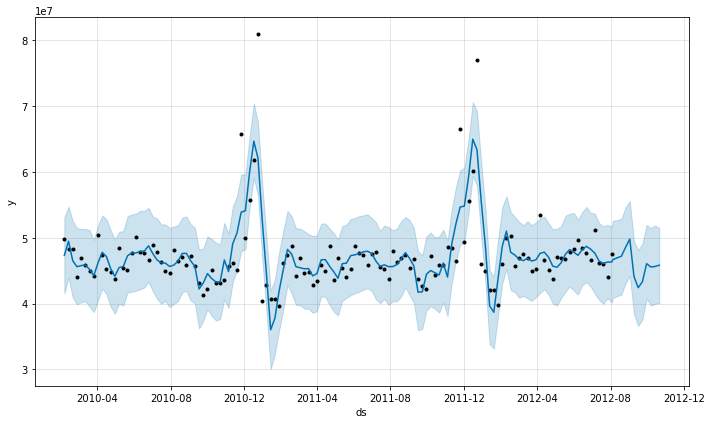

In [548]:
model = Prophet(interval_width=0.90,seasonality_mode='additive')
model.add_regressor('Nov-Dec_month',standardize=True)
model.add_regressor('Fuel_Price',standardize=True)
model.add_regressor('Temperature',standardize=True)
model.add_regressor('Holiday_Flag',standardize=True)
model.add_regressor('Unemployment',standardize=True)
model.fit(train_data_global)
future_df = pd.DataFrame(model.make_future_dataframe(periods=12,freq='W'))
future_df['Nov-Dec_month'] = entire_data_global['Nov-Dec_month']
future_df['Fuel_Price'] = entire_data_global['Fuel_Price']
future_df['Temperature'] = entire_data_global['Temperature']
future_df['Holiday_Flag'] = entire_data_global['Holiday_Flag']
future_df['Unemployment'] = entire_data_global['Unemployment']

future_prediction = model.predict(future_df)
    
model.plot(future_prediction);

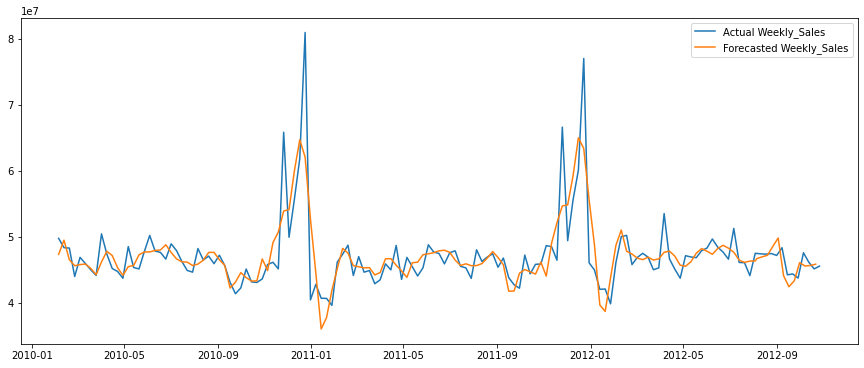

In [549]:
# Visualising Actual Vs Forecasted sales
plt.plot(entire_data_global.set_index('ds')['y'],label='Actual Weekly_Sales')
plt.plot(future_prediction.set_index('ds')['yhat'],label='Forecasted Weekly_Sales')
plt.legend()

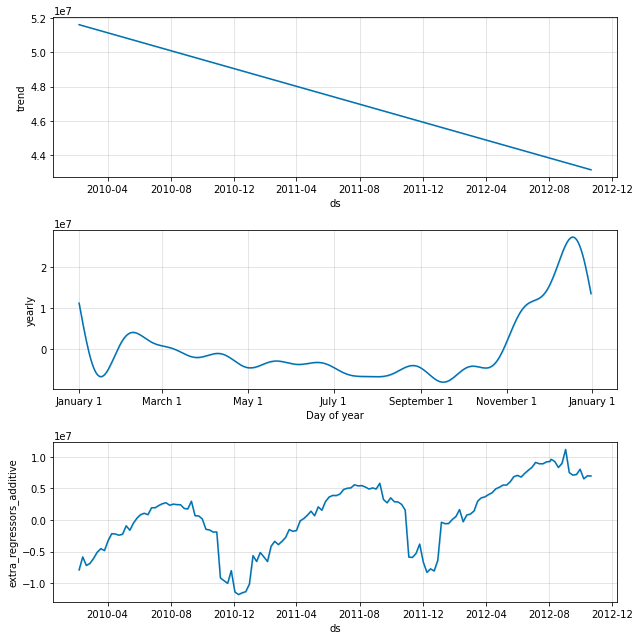

In [550]:
model.plot_components(future_prediction);

# Model Evaluation and Technique



In [551]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
print(mean_absolute_percentage_error(entire_data_global['y'],future_prediction['yhat'])*100)

4.08690139200255


* Model has been created with a confidence of 90%. From the graph it is clear that, most of the points are lying in the confidence range. There seems to be some anomolies present in our data set. We can clearly see the extreeme values that are present in the Dec month. As we mentioned earlier, that can be mainly due to the holiday sales. Eventhough special mentioning is provided to Nov and Dec months, model is not able to cover those outlined values. That indiactes that there still exist some randomness in the data. 

* MAPE (Mean absolute percentage error) is considered to calculate the relative error. 

* The randomness might be due to some other features that are not mentioned in the given dataset. However model is performing good with mean_absolute_error_percentage of **4.086%**

* Weekly sales are found to be high in the month of Nov and Dec. 


In [552]:
# Applying to each store_individually
groups = training_set.groupby('Store')
Store_wise_forecasted_results = pd.DataFrame()
for i in range(1,46):
    model = Prophet(interval_width=0.75,seasonality_mode='additive')
    group = pd.DataFrame(groups.get_group(i))
    model.add_regressor('Nov-Dec_month',standardize=True)
    model.add_regressor('Fuel_Price',standardize=True)
    model.add_regressor('Temperature',standardize=True)
    model.add_regressor('Holiday_Flag',standardize=True)
    model.add_regressor('Unemployment',standardize=True)
    model.fit(group)
    future_df = pd.DataFrame(model.make_future_dataframe(periods=12,freq='W'))
    future_df['Nov-Dec_month'] = entire_data[entire_data['Store']==i]['Nov-Dec_month'].values
    future_df['Temperature'] = entire_data[entire_data['Store']==i]['Temperature'].values
    future_df['Holiday_Flag'] = entire_data[entire_data['Store']==i]['Holiday_Flag'].values
    future_df['Unemployment'] = entire_data[entire_data['Store']==i]['Unemployment'].values
    future_df['Fuel_Price'] = entire_data[entire_data['Store']==i]['Fuel_Price'].values
    future_prediction = model.predict(future_df)
    future_prediction.rename({'yhat':'yhat_store{}'.format(i),
                              'yhat_lower':'yhat_lower_store{}'.format(i),
                              'yhat_upper':'yhat_upper_store{}'.format(i)
                             },axis='columns',inplace=True)
    Store_wise_forecasted_results = pd.merge(Store_wise_forecasted_results,future_prediction.set_index('ds'),how='outer',left_index=True,right_index=True)

    

    

17:54:00 - cmdstanpy - INFO - Chain [1] start processing
17:54:00 - cmdstanpy - INFO - Chain [1] done processing
17:54:01 - cmdstanpy - INFO - Chain [1] start processing
17:54:01 - cmdstanpy - INFO - Chain [1] done processing
17:54:01 - cmdstanpy - INFO - Chain [1] start processing
17:54:01 - cmdstanpy - INFO - Chain [1] done processing
17:54:02 - cmdstanpy - INFO - Chain [1] start processing
17:54:02 - cmdstanpy - INFO - Chain [1] done processing
17:54:02 - cmdstanpy - INFO - Chain [1] start processing
17:54:02 - cmdstanpy - INFO - Chain [1] done processing
17:54:02 - cmdstanpy - INFO - Chain [1] start processing
17:54:03 - cmdstanpy - INFO - Chain [1] done processing
17:54:03 - cmdstanpy - INFO - Chain [1] start processing
17:54:03 - cmdstanpy - INFO - Chain [1] done processing
17:54:03 - cmdstanpy - INFO - Chain [1] start processing
17:54:03 - cmdstanpy - INFO - Chain [1] done processing
17:54:04 - cmdstanpy - INFO - Chain [1] start processing
17:54:04 - cmdstanpy - INFO - Chain [1]

* All the results are stored in the Store_wise_forecasted_results Data Frame. Results corresponding to each store can be accessed from that data frame

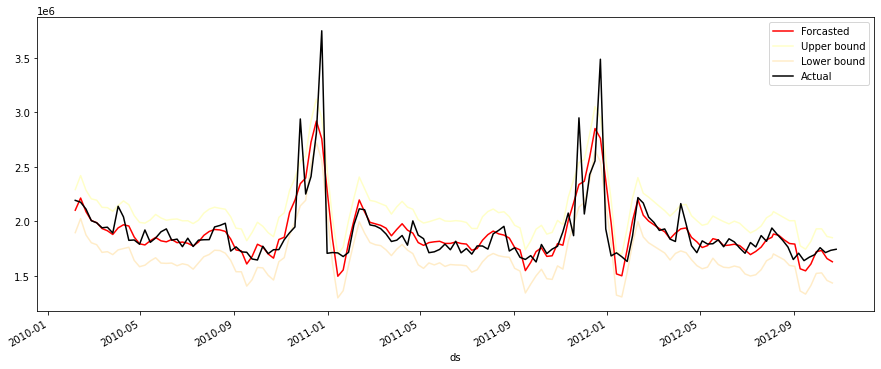

In [553]:
Store_wise_forecasted_results['yhat_store10'].plot(color='red',label='Forcasted')
Store_wise_forecasted_results['yhat_upper_store10'].plot(color='#ff34',label='Upper bound')
Store_wise_forecasted_results['yhat_lower_store10'].plot(color='#fb34',label='Lower bound')
entire_data[entire_data['Store']==10].set_index('ds')['y'].plot(color='black',label='Actual')
plt.legend()

# Inferences from the Project


* The sales of Walmart stores are not constant over the time, with troughs during the summer and peaks in the winter season. This is likely due to a number of factors, including the weather, school schedules, and consumer spending habits.
* The sales of Walmart stores are also affected by holidays. Prople are preferring shopping oh holidays. 
* Weekly sales are found to be high in the month of Nov and Dec. 
 

# Future Possibilities

Walmart sales forecast project has a number of future possibilities.like
1. **Improving the accuracy of the forecast**: The current forecast is good, but there is always room for improvement. By using more data, better algorithms, and more sophisticated models, it is possible to improve the accuracy of the forecast even further.

* <h5>Note: I tried to implement the LSTM forecasting, But it was unsuccessful because of the limited data. As Deep learning models requires more amount of data, Applying LSTM model is useless in the present case. </h5>

2. **Increasing the granularity of the forecast**: The current forecast is for the sales of Walmart stores as a whole. It is possible to increase the granularity of the forecast by forecasting the sales of individual departments, and products. This would allow Walmart to make more informed decisions about inventory, pricing, and marketing.
3. **Including more factors in the forecast**: The current forecast only includes a few factors, such as the Temperature, Weekend holidays, Fuel important. It is possible to include more factors in the forecast, such as the economy, consumer behavior, and product trends. This would give Walmart a more complete picture of the factors that affect its sales.


# Conclusion
* The Walmart sales forecast project is a valuable tool that can help the company to make better business decisions. The project has the potential to improve the accuracy of the forecast, increase the granularity of the forecast, and include more factors in the forecast. This would give Walmart a more complete picture of the factors that affect its sales and allow the company to make better decisions about inventory, pricing, and marketing.
* This project has the potential to revolutionize the way Walmart does business. By using data science and machine learning, Walmart can gain a deeper understanding of its customers and make better decisions about how to serve them. This could lead to significant improvements in sales, profitability, and customer satisfaction.

# References
1. FBProphet Documentation: https://pypi.org/project/fbprophet/
2. Model development is inspired from Srivatsan Srinivasan GITHUB repo-material: https://github.com/srivatsan88/End-to-End-Time-Series.
3. Detailed guide on Time series:  https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/